In [14]:
bayesplay::loadpackages()

# Using the `bayesplay` package

## Defining likelihoods

**SUMMARY**   
The `bayesplay` provides 3 options for defining likelihoods. 

1. The non-central *t* distribution is defined with `t.lik()`
2. The normal distribution is defined with `norm.lik()`
3. The scaled and shifted *t* distribution is defined with `scaled.shifted.t.lik()`

If you're working with **standardised effect sizes** then you'll use the *t likelihood*, which is implemented with the `t.lik()` function. This can be used for **one-sample** or **paired** problems that you'd ordinarily use a *t*-test for. It take two parameters `center` which is your effect size (it defines where the likelihood will be centred), and `df` which is 1 minus your sample size. Below I define a *t likelihood* for an observation of a *d*  of 1 with a sample size of *25*.



In [15]:
# 1

data_model1 = t.lik(center = 1,df = 24)
data_model1

Object of class likelihood 
Likelihood type: non-central t 
Parameters
Center: 1
DF: 24

To plot a likelihood you can just use the `plot` function. It takes the likelihood object the **range of the x-axis** as the inputs. For the range, you need to input the actual x-axis points. To do this, you can use the `seq()` function. 


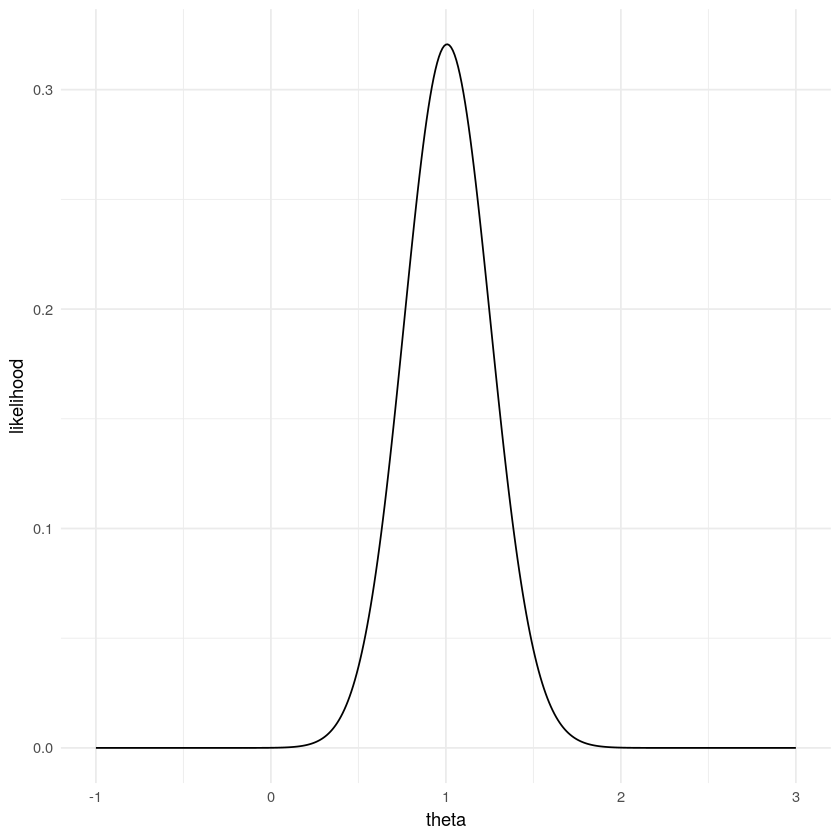

In [16]:
# 2

plot(data_model1, seq(from = -1,to = 3,by = .01))

The other likelihoods you can define are a **normal distribution** and a **scaled and shifted t**. For a normal distribution you use the function `norm.lik()`. The inputs are the `center` (for example, your observed mean or mean difference) and the `scale`, which corresponds to the **standard error of the mean** or mean difference.  Below I define a likelihood corresponding to an observation of a mean of 1, with an standard deviation of 1 in a sample size of 25—this corresponds to a standard error of $\frac{1}{\sqrt{25}}$.


Object of class likelihood 
Likelihood type: normal 
Parameters
Center: 1
Scale: 0.2

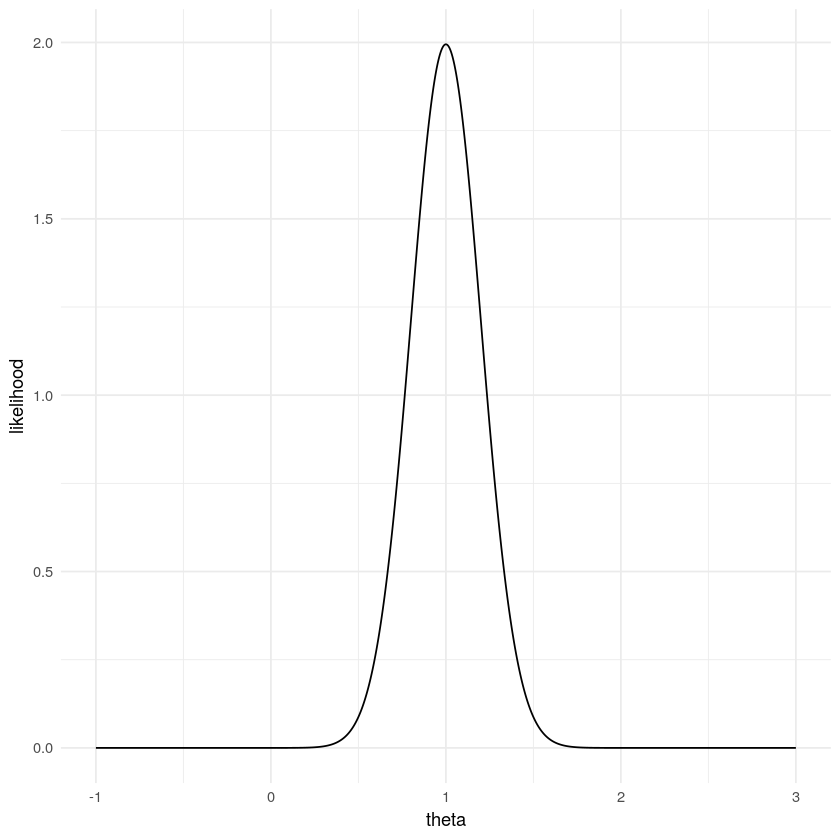

In [17]:
# 3

data_model2 = norm.lik(center = 1, scale = 1 / sqrt(25))
data_model2

plot(data_model2, seq(from = -1,to = 3,by = .001))

The **scaled and shifted t** can be used in the same situation and the normal distribution. It is defined using the `scaled.shifted.t.lik`. It takes a combination of the parameters that are used for the normal and the non-central t. That is, you need to give the `center` the `scale` and the `df`—the `df` would correspond to N - 1 for a one sample problem or N - 2 for a two sample problem.

Object of class likelihood 
Likelihood type: Shifted and Scaled t 
Parameters
Center: 1
Scale: 0.2
DF: 24

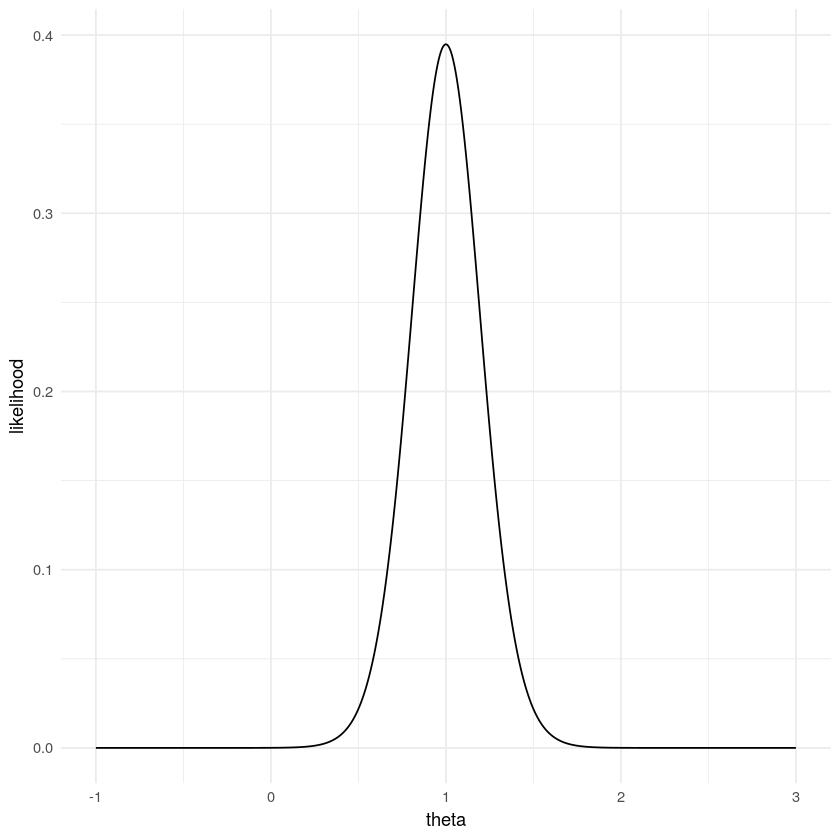

In [18]:
#4 

data_model3 = scaled.shifted.t.lik(center = 1, scale = 1/sqrt(25), 24)
data_model3

plot(data_model3, seq(from = -1,to = 3,by = .001))

## Defining priors

To define a prior/model you'll use the following construction.

```r
prior = function(theta.range)
    {
    list(func = function(theta) PRIOR_FUNCTION,
         theta.range = theta.range)
    }
```

You can define priors that correspond to **normal** distributions, **cauchy** distributions, **uniform** distributions and **t** distributions. If you don't know what these distributions look like then I recommend visiting the [**Distribution Zoo**](https://ben18785.shinyapps.io/distribution-zoo/)

Below I'll run through defining a prior for each distribution type. 

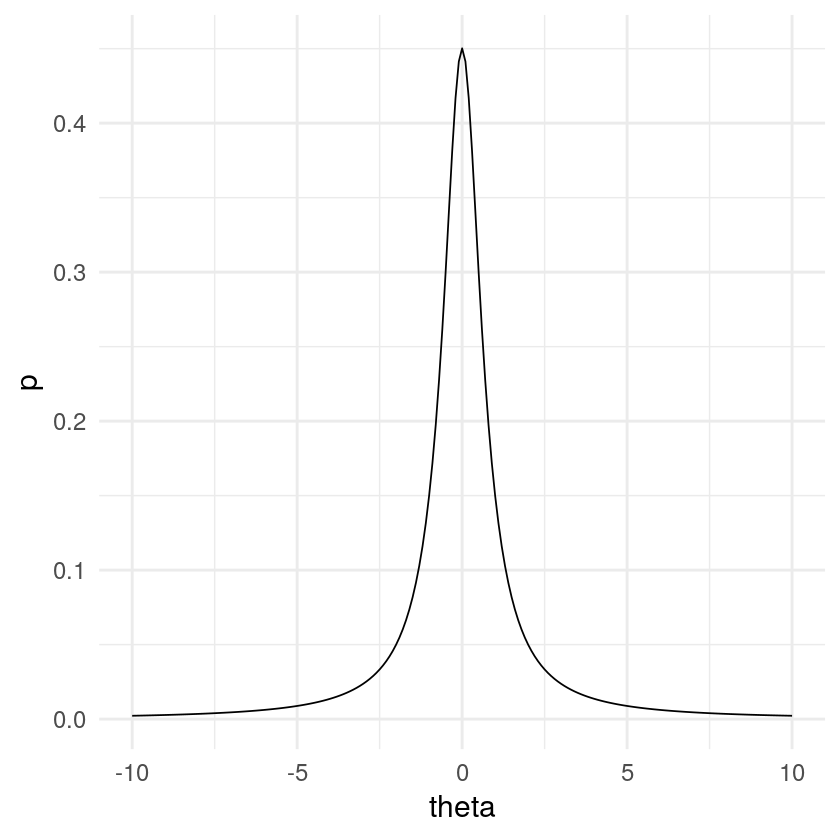

In [19]:
#5 


# First we'll define a cauchy prior


# For the cauchy you'll set the location and the scale
# This defines the center and the width
cauchy_prior = function(theta.range)
    {
    list(func = function(theta) dcauchy(x = theta, location = 0, scale = .707),
         theta.range = theta.range)
    }

# to make a plot, first = set the range of values to plot over
theta_range = seq(-10,10,.1) # from -10 to +10 in steps 0.1
plot_prior(cauchy_prior,theta_range)

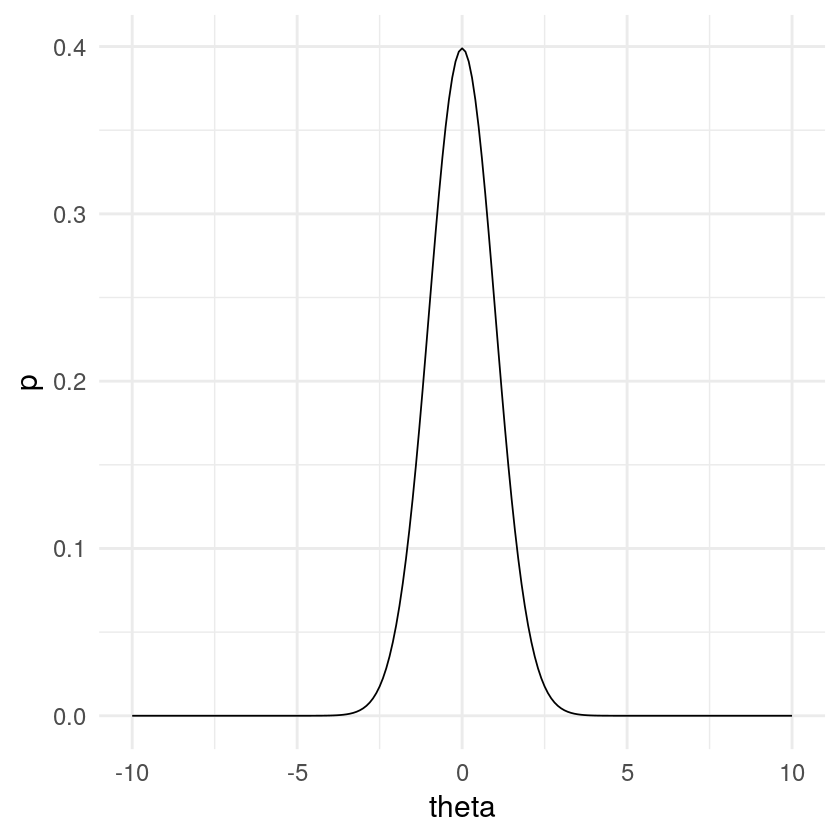

In [20]:
# 6

# Next we'll define a normal prior


# For the normal you'll set the mean and the sd
# This defines the center and the width
normal_prior = function(theta.range)
    {
    list(func = function(theta) dnorm(x = theta, mean = 0, sd = 1),
         theta.range = theta.range)
    }

# to make a plot, first = set the range of values to plot over
theta_range = seq(-10,10,.1) # from -10 to +10 in steps 0.1
plot_prior(normal_prior,theta_range)

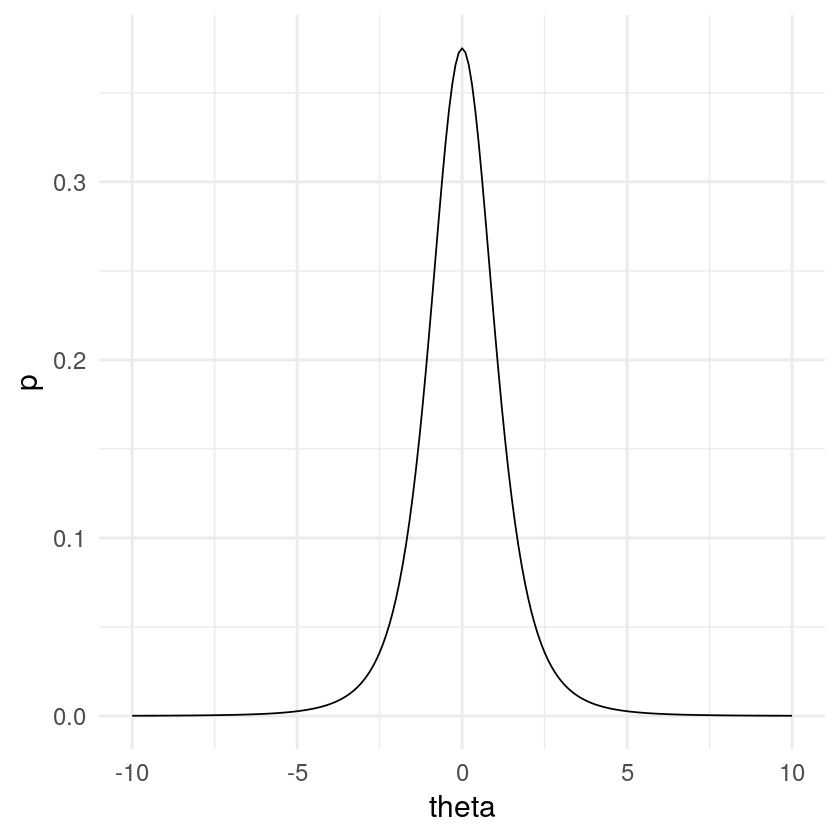

In [21]:
# 7 

# Next we'll define a t prior

# For the t you'll set the ncp and df
# This defines the center and how fat the tails are
t_prior = function(theta.range)
    {
    list(func = function(theta) dt(x = theta, ncp  = 0, df = 4),
         theta.range = theta.range)
    }


# to make a plot, first = set the range of values to plot over
theta_range = seq(-10,10,.1) # from -10 to +10 in steps 0.1
plot_prior(t_prior,theta_range)

In [22]:
# 8 

# You can also define a scaled t prior

scaled_t_prior = function(theta.range)
    {
    list(func = function(theta) dt.scaled(x = theta, ncp = 0, scale = 2, df = 5),
         theta.range = theta.range)
    }


# to make a plot, first = set the range of values to plot over
theta_range = seq(-10,10,.1) # from -10 to +10 in steps 0.1
plot_prior(scaled_t_prior,theta_range)

ERROR: Error in dt.scaled(x = theta, ncp = 0, scale = 2, df = 5): unused argument (scale = 2)


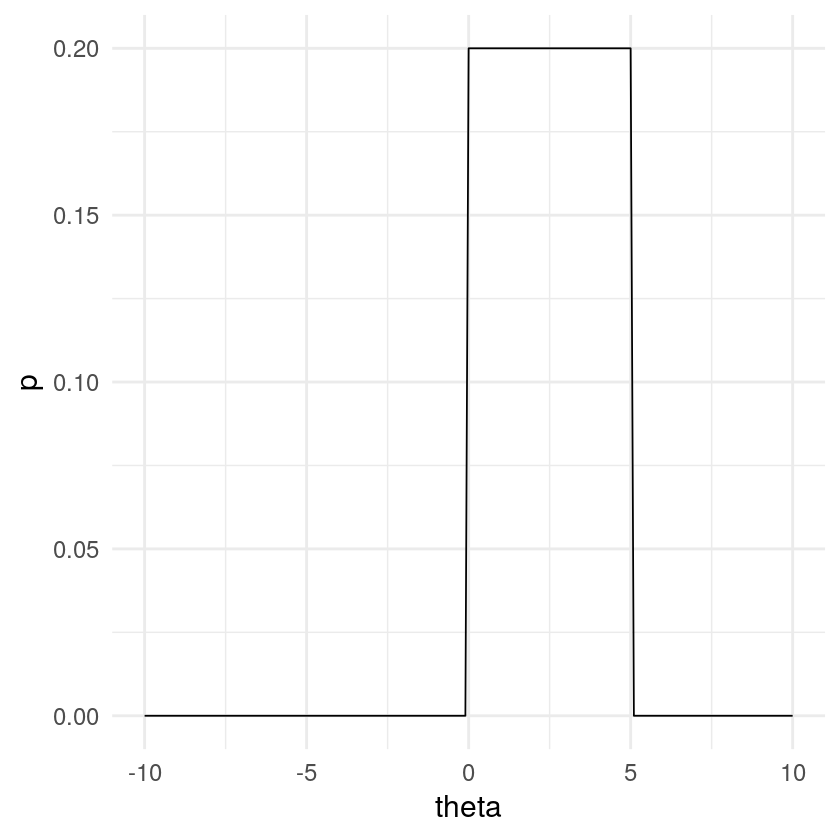

In [23]:
# 9 

# Next we'll define a uniform prior
# For this you'll need to set the minimum and the maximum

uniform_prior = function(theta.range)
    {
    list(func = function(theta) dunif(x = theta, min = 0, max = 5),
         theta.range = theta.range)
    }


# to make a plot, first = set the range of values to plot over
theta_range = seq(-10,10,.1) # from -10 to +10 in steps 0.1
plot_prior(uniform_prior,theta_range)


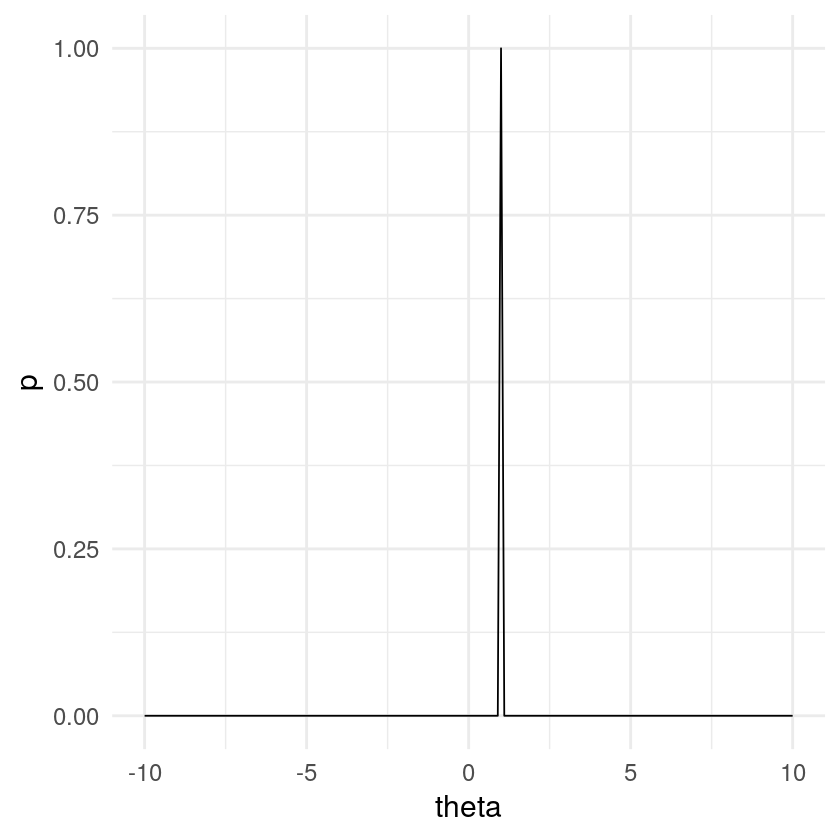

In [24]:
# 10

# finally, we'll define a point prior 
# you just need to set the point where you want to put the weight

point_prior = function(theta.range)
    {
    list(func = function(theta) ifelse(theta == 1, 1, 0),
         theta.range = theta.range)
    }


# to make a plot, first = set the range of values to plot over
theta_range = seq(-10,10,.1) # from -10 to +10 in steps 0.1
plot_prior(point_prior,theta_range)

## Computing the Bayes factor

Finally, to compute the **Bayes factor** we'll just multiply the likelihood by the prior and take the integral for each model. During this you'll need to specify the range of parameter values you want to consider for each model.


In [25]:
# 11

M1 = data_model1 * normal_prior(theta.range = c(0,Inf))
M2 = data_model1 * uniform_prior(theta.range = c(-10,10))
BF = M1$integral / M2$integral
bfsay(BF,"M1","M2")

Using the levels from  Wagenmakers et al (2017; https://doi.org/10.3758/s13423-017-1323-7)
A BF of 2.39407610412576 indicates:
Anecdotal evidence for M1
